In [176]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

<b> Hit Or Miss Transform </b>


Used in finding a given configuration / pattern in a binary image . Uses basic morphological image processing as a basis (i.e erosion and diliation).

This transform find those pixels whose neighbourhood matchines the shape of a first structuring element B1 while *not* matching the shape of a second structuring element B2 simultaneously.

That is, A (*) B = (A (-) B1 ) ^ (A' (-) B2) \
where, A is the source image and B is the structural element, \
(*) is the hit or miss transform, \
(-) is the erosion operation, \
X' is the complement of X, \
^ is the intersection operator.

source image


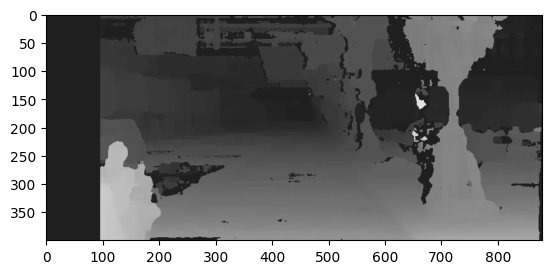

thresholded image


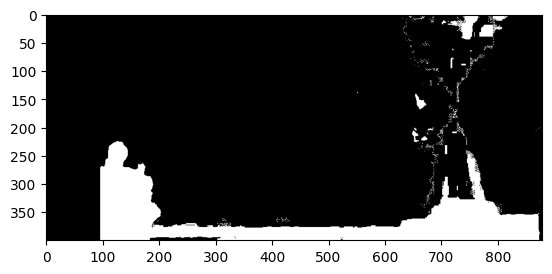

255
threshold image complement


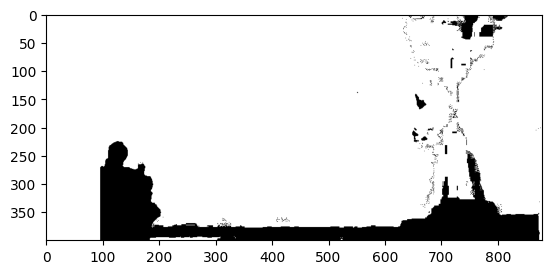

255


In [177]:
image = cv2.imread('../data/stereo/hit_or_miss_disp_map.jpg', 0)
print('source image')
plt.imshow(image, cmap='gray')
plt.show()

threshold_image =  cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
print('thresholded image')
plt.imshow(threshold_image, cmap='gray')
plt.show()

print(threshold_image.max())
threshold_image_complement = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]

print('threshold image complement')
plt.imshow(threshold_image_complement, cmap='gray')
plt.show()

print(threshold_image.max())

In [178]:
# Setup structuring element : for detection the bike rider in this scenario.
se_b1 = np.ones((125, 72), dtype=np.uint8)
se_b2 = np.zeros(se_b1.shape, dtype=np.uint8)
for i in range(se_b1.shape[0]):
    for j in range(se_b1.shape[1]):
        #se_b2[i, j] = np.max(1 - se_b1[i, j], 0)
        pass
se_b2 = se_b2.astype(np.uint8)

print('circle se b1\n', se_b1)
print('shape : ', se_b1.shape)
print('circle se b2\n', se_b2)

circle se b1
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
shape :  (125, 72)
circle se b2
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0 0
a eroded by b1


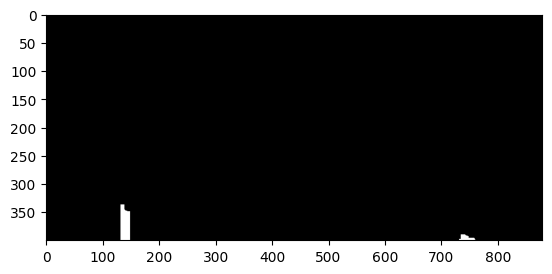

ac eroded by b2 


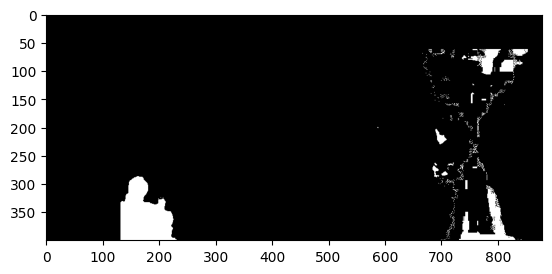

hit or miss result


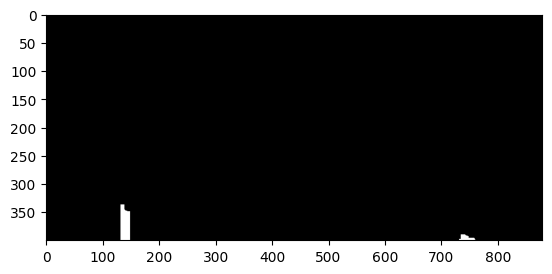

In [180]:
# Step 1 : A erroded by B1.
a_eroded_b1 = cv2.erode(threshold_image, se_b1)

# Step 2 : Ac erroded by B2.
ac_eroded_b2 = cv2.erode(threshold_image_complement, se_b2)

ac_eroded_b2 = cv2.threshold(ac_eroded_b2, 1, 1, type=cv2.THRESH_BINARY_INV)[1]

print(a_eroded_b1.min(), ac_eroded_b2.min())
hitormiss_result = cv2.bitwise_and(a_eroded_b1, ac_eroded_b2)

print('a eroded by b1')
plt.imshow(a_eroded_b1, cmap='gray')
plt.show()

print('ac eroded by b2 ')
plt.imshow(ac_eroded_b2, cmap='gray')
plt.show()

print('hit or miss result')
plt.imshow(hitormiss_result, cmap='gray')
plt.show()